# Lab 3
## More EDA: improving expertise in loading, cleaning, and analyzing data

The objective of Lab 3 is for you to become more proficient in obtaining and working with different types of data. A particular emphasis will be on dealing with text data.

This lab assignment will have 3 components. 

## Lab 3.A. Complete tutorials from Harvard's CS109 Lab 1

Go to https://github.com/cs109/2015lab1 and download the following files in your local Lab3 directory:
- https://github.com/cs109/2015lab1/blob/master/Lab1-babypython.ipynb
- https://github.com/cs109/2015lab1/blob/master/Lab1-pythonpandas.ipynb
- https://github.com/cs109/2015lab1/blob/master/all.csv

Study all the code and run every block of code from the *babypython* tutorial. It covers many of the things you already learned in your Labs 1 and 2, so it is a good refresher. However, there are some new things. In particular, you will learn how to load a pure textual file and process it to find counts of all the unique words (also called the tokens) in the text. When going over this tutorial, you can disregard the following blocks of code: 10, 11, 21-23.

Study all the code and run every block of code from the *pythonpandas* tutorial. Again, you will find there many things you already know. However, the novelty here is in processing and analysis of a slightly messy tabular data than was the case with the *Auto MPG data*. When going over this code you can disregard code block 24.

**Deliverable**: submit the two .ipynb files after you have run all the lines of code. We will appreciate if we see that you put some extra effort, such as trying to modify existing code, enter new lines of code, or provide comments in the text. Make sure any modifications are easily visible by us for the grading purposes.

## Lab 3.B. Movie Lens Data

In this part of the lab, you will be working on an exercise that is a slightly modified and shortened version of https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb. In particular, you will learn how to load and analyze MoviLens data, which contains ratings of multiple movies by multiple users.

**The MovieLens data**

http://grouplens.org/datasets/movielens/

Take some time to learn about the data, because it will be helpful to do the assignment.


In [69]:
## all imports
from IPython.display import HTML
import numpy as np
import urllib2
import bs4 #this is beautiful soup
import time
import operator
import socket
import cPickle
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [70]:
# Read the user data:
#   pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

users = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.user', 
    sep='|', names=u_cols)

users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [71]:
# Read the ratings:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.data', 
    sep='\t', names=r_cols)

ratings.head() 

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [72]:
# Read the movies data
#  the movies file contains columns indicating the movie's genres
#  let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 
            'video_release_date', 'imdb_url']

movies = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.item', 
    sep='|', names=m_cols, usecols=range(5))

movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


Get information about the data:

In [73]:
print movies.dtypes
print
print
print movies.describe()

# *** Why only those two columns? ***
#Because the datatype of the column is not Objects but Number

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object


          movie_id  video_release_date
count  1682.000000                 0.0
mean    841.500000                 NaN
std     485.695893                 NaN
min       1.000000                 NaN
25%     421.250000                 NaN
50%     841.500000                 NaN
75%    1261.750000                 NaN
max    1682.000000                 NaN


Selecting data:

* DataFrame => group of Series with shared index
* single DataFrame column => Series

In [74]:
users.head()
users['occupation'].head()
## *** Where did the nice design go? ***
columns_you_want = ['occupation', 'sex'] 
users[columns_you_want].head()

print users.head()

print users.iloc[3]

   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213
user_id                4
age                   24
sex                    M
occupation    technician
zip_code           43537
Name: 3, dtype: object


In [75]:
columns_you_want = ['occupation', 'sex'] 
users[columns_you_want].head()


,occupation,sex
0,technician,M
1,other,F
2,writer,M
3,technician,M
4,other,F


Filtering data:

Select users older than 25

In [76]:
oldUsers = users[users.age >21]
oldUsers.head(6)


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101


**Question 1**: 
* show users aged 40 and male
* show the mean age of female programmers

In [77]:
#1.
# users aged 40 AND male
# your code here
fortymale = users[(users.age == 40) & (users['sex']=='M')]
print fortymale

     user_id  age sex  occupation zip_code
18        19   40   M   librarian    02138
82        83   40   M       other    44133
115      116   40   M  healthcare    97232
199      200   40   M  programmer    93402
283      284   40   M   executive    92629
289      290   40   M    engineer    93550
308      309   40   M   scientist    70802
357      358   40   M    educator    10022
397      398   40   M       other    60008
564      565   40   M     student    55422
646      647   40   M    educator    45810
791      792   40   M  programmer    12205
841      842   40   M      writer    93055
917      918   40   M   scientist    70116


In [78]:
#1.
## users who are female and programmers
# your code here
femaleProgrammer = users[(users['occupation']=='programmer') & (users['sex']=='F')]
print femaleProgrammer

     user_id  age sex  occupation zip_code
291      292   35   F  programmer    94703
299      300   26   F  programmer    55106
351      352   37   F  programmer    55105
403      404   29   F  programmer    55108
420      421   38   F  programmer    55105
697      698   28   F  programmer    06906


In [79]:
#1.
## show statistic summary or compute mean
# your code here
femaleProgrammer['age'].mean()

32.166666666666664

In [80]:
columns_you_want = ['occupation', 'sex'] 
print users[columns_you_want].head()


   occupation sex
0  technician   M
1       other   F
2      writer   M
3  technician   M
4       other   F


In [81]:
print ratings.head()
## split data
grouped_data = ratings.groupby('user_id')
#grouped_data = ratings['movie_id'].groupby(ratings['user_id'])
## count and combine
ratings_per_user = grouped_data.count()

ratings_per_user.head(5)

   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596


,movie_id,rating,unix_timestamp
user_id,,,
1,272,272,272
2,62,62,62
3,54,54,54
4,24,24,24
5,175,175,175


Find Diligent Users

- split data per user ID
- count ratings
- combine result



In [82]:
print ratings.head()
## split data
grouped_data = ratings.groupby('user_id')
#grouped_data = ratings['movie_id'].groupby(ratings['user_id'])

## count and combine
ratings_per_user = grouped_data.count()

ratings_per_user.head(5)

   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596


,movie_id,rating,unix_timestamp
user_id,,,
1,272,272,272
2,62,62,62
3,54,54,54
4,24,24,24
5,175,175,175


**Question 2**:
* get the average rating per movie
* advanced: get the movie titles with the highest average rating

In [87]:
## split data
# your code here
grouped_movie_data = ratings['rating'].groupby(ratings['movie_id'])
## average and combine
rating_per_movie = grouped_movie_data.mean()
print "Average rate per movie:"
print rating_per_movie.head()
# get the maximum rating
max_rate = rating_per_movie.max()
max_rating_movie = rating_per_movie[(rating_per_movie==max_rate)].index
print
# get movie ids with that rating
print "Good movie ids:"
print max_rating_movie
print 

print "Best movie titles:"
best_titles = movies[movies.movie_id.isin(max_rating_movie)].title
print best_titles
print 

print "Number of ratings per movie:"

#group_data1 = ratings.groupby(['movie_id'])['rating']
#average_rate1 = group_data1.mean()
#max_id1=average_rate1.idmax()

grouped_movie_data = ratings['rating'].groupby(ratings['movie_id'])
rating_per_movie = grouped_movie_data.count()
print rating_per_movie.head()


Average rate per movie:
movie_id
1    3.878319
2    3.206107
3    3.033333
4    3.550239
5    3.302326
Name: rating, dtype: float64

Good movie ids:
Int64Index([814, 1122, 1189, 1201, 1293, 1467, 1500, 1536, 1599, 1653], dtype='int64', name=u'movie_id')

Best movie titles:
813                         Great Day in Harlem, A (1994)
1121                       They Made Me a Criminal (1939)
1188                                   Prefontaine (1997)
1200           Marlene Dietrich: Shadow and Light (1996) 
1292                                      Star Kid (1997)
1466                 Saint of Fort Washington, The (1993)
1499                            Santa with Muscles (1996)
1535                                 Aiqing wansui (1994)
1598                        Someone Else's America (1995)
1652    Entertaining Angels: The Dorothy Day Story (1996)
Name: title, dtype: object

Number of ratings per movie:
movie_id
1    452
2    131
3     90
4    209
5     86
Name: rating, dtype: int64


**Question 3**:
* get the average rating per user
* list all occupations and if they are male or female dominant

In [ ]:
#3. get the average rating per user
grouped_user_data = ratings['rating'].groupby(ratings['user_id'])
average_rate = grouped_user_data.mean()
print average_rate.head()


In [ ]:
#3. list all occupations and if they are male or female dominant
users.groupby(['occupation','sex']).size()

In [ ]:

print 'number of male users: '
print sum(users['sex'] == 'M')

print 'number of female users: '
print sum(users['sex'] == 'F')

In [ ]:
#users.head()
## *** Where did the nice design go? ***


#print users.head()

#print users.iloc[3]

**Question 4**:
- produce a 1-page document that uses a combination of text, tables, and figures that provide some interesting insights about the Movie Lens data. You should feel free to use outside sources to produce the report, as long as you acknowledge your sources. 

## Lab 3.C. HTML Data

In this part of the lab, you will be also be working on an exercise that is a slightly modified and shortened version of https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb. In particular, you will learn how to load and analyze html data.

HTML:
* HyperText Markup Language
* standard for creating webpages
* HTML tags 
    - have angle brackets
    - typically come in pairs


In [39]:
htmlString = """<!DOCTYPE html>
<html>
  <head>
    <title>This is a title</title>
  </head>
  <body>
    <h2> Test </h2>
    <p>Hello world!</p>
  </body>
</html>"""

htmlOutput = HTML(htmlString)
htmlOutput

Useful Tags:

* heading
`<h1></h1> ... <h6></h6>`

* paragraph
`<p></p>` 

* line break
`<br>` 

* link with attribute

`<a href="http://www.example.com/">An example link</a>`

### Scraping with Python:

Example of a simple webpage: http://www.crummy.com/software/BeautifulSoup

Good news: 
    - some browsers help
    - look for: inspect element
    - need only basic html
    - try 'Ctrl-Shift I' in Chrome
    - try 'Command-Option I' in Safari
   
Different useful libraries:
    - urllib
    - beautifulsoup
    - pattern
    - soupy
    - LXML
    - ...
 
The following cell just defines a url as a string and then reads the data from that url using the `urllib` library. If you uncomment the print command you see that we got the whole HTML content of the page into the string variable source.

In [40]:
url = 'http://www.crummy.com/software/BeautifulSoup'
source = urllib2.urlopen(url).read()
print source

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"
"http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link rev="made" href="mailto:leonardr@segfault.org">
<link rel="stylesheet" type="text/css" href="/nb/themes/Default/nb.css">
<meta name="Description" content="Beautiful Soup: a library designed for screen-scraping HTML and XML.">
<meta name="generator" content="Markov Approximation 1.4 (module: leonardr)">
<meta name="author" content="Leonard Richardson">
</head>
<body bgcolor="white" text="black" link="blue" vlink="660066" alink="red">
<img align="right" src="10.1.jpg" width="250"><br />

<p>You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.</p>

<

**Question 5**:

* Is the word 'Alice' mentioned on the beautiful soup homepage?
* How often does the word 'Soup' occur on the site?
    - hint: use `.count()`
* At what index occurs the substring 'alien video games' ?
    - hint: use `.find()`

In [41]:
## is 'Alice' in source?
import re
if re.search(r'Alice',source):
    print 'yes'
else: 
    print 'no'

sourcetokens=source.split()#split with no arguments splits on whitespace
sourcetokens=[word.lower() for word in sourcetokens]
print sourcetokens.count('soup')
## count occurences of 'Soup'

## find index of 'alien video games'
str1 = "alien video games";
print source.find(str1)


no
29
-1


**Beautiful Soup**

* designed to make your life easier
* many good functions for parsing html code

Some examples:

In [42]:
## get bs4 object
soup = bs4.BeautifulSoup(source)
 
## compare the two print statements
#print soup
#print soup.prettify()


## show how to find all a tags
soup.findAll('a')

## ***Why does this not work? ***
#soup.findAll('Soup')

/Users/chaunguyen/anaconda3/envs/py27/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /Users/chaunguyen/anaconda3/envs/py27/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


[<a href="bs4/download/"><h1>Beautiful Soup</h1></a>,
 <a href="#Download">Download</a>,
 <a href="bs4/doc/">Documentation</a>,
 <a href="#HallOfFame">Hall of Fame</a>,
 <a href="https://code.launchpad.net/beautifulsoup">Source</a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">Discussion group</a>,
 <a href="zine/">Zine</a>,
 <a href="zine/"><i>Tool Safety</i></a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">the discussion\ngroup</a>,
 <a href="https://bugs.launchpad.net/beautifulsoup/">file it</a>,
 <a href="http://lxml.de/">lxml</a>,
 <a href="http://code.google.com/p/html5lib/">html5lib</a>,
 <a href="bs4/doc/">Read more.</a>,
 <a name="Download"></a>,
 <a name="Download">Download Beautiful Soup</a>,
 <a href="bs4/download/">Beautiful Soup\n4.6.0</a>,
 <a href="http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html">Here's\nthe Beautiful Soup 3 documentation.</a>,
 <a href="download/3.x/BeautifulSoup-3.2.1.t

More examples:

In [43]:
## get attribute value from an element:
## find tag: this only returns the first occurrence, not all tags in the string
first_tag = soup.find('a')

## get attribute `href`
first_tag.get('href')

## get all links in the page
link_list = [l.get('href') for l in soup.findAll('a')]
link_list

[u'bs4/download/',
 u'#Download',
 u'bs4/doc/',
 u'#HallOfFame',
 u'https://code.launchpad.net/beautifulsoup',
 u'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 u'zine/',
 u'zine/',
 u'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 u'https://bugs.launchpad.net/beautifulsoup/',
 u'http://lxml.de/',
 u'http://code.google.com/p/html5lib/',
 u'bs4/doc/',
 None,
 None,
 u'bs4/download/',
 u'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 u'download/3.x/BeautifulSoup-3.2.1.tar.gz',
 None,
 None,
 u'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 u'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 u'http://www.harrowell.org.uk/viktormap.html',
 u'http://svn.python.org/view/tracker/importer/',
 u'http://www2.ljworld.com/',
 u'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 u'http://esrl.noaa.gov/gsd/fab/',
 u'http://laps.noaa.gov/topograbber/',
 u'http:/

In [44]:
## filter all external links
# create an empty list to collect the valid links
external_links = []

# write a loop to filter the links
# if it starts with 'http' we are happy
for l in link_list:
    if l[:4] == 'http':
        external_links.append(l)

# this throws an error! It says something about 'NoneType'

TypeError: 'NoneType' object has no attribute '__getitem__'

In [45]:
# lets investigate. Have a close look at the link_list:
link_list

# Seems that there are None elements!
# Let's verify
print sum([l is None for l in link_list])

# So there are two elements in the list that are None!

4


In [46]:
# Let's filter those objects out in the for loop
external_links = []

# write a loop to filter the links
# if it is not None and starts with 'http' we are happy
for l in link_list:
    if l is not None and l[:4] == 'http':
        external_links.append(l)
        
external_links

[u'https://code.launchpad.net/beautifulsoup',
 u'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 u'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 u'https://bugs.launchpad.net/beautifulsoup/',
 u'http://lxml.de/',
 u'http://code.google.com/p/html5lib/',
 u'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 u'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 u'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 u'http://www.harrowell.org.uk/viktormap.html',
 u'http://svn.python.org/view/tracker/importer/',
 u'http://www2.ljworld.com/',
 u'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 u'http://esrl.noaa.gov/gsd/fab/',
 u'http://laps.noaa.gov/topograbber/',
 u'http://groups.google.com/group/beautifulsoup/',
 u'https://launchpad.net/beautifulsoup',
 u'https://code.launchpad.net/beautifulsoup/',
 u'https://bugs.launchpad.net/beautifulsoup/',
 u'http://creati

*Note*: The above `if` condition works because of lazy evaluation in Python. The `and` statement becomes `False` if the first part is `False`, so there is no need to ever evaluate the second part. Thus a `None` entry in the list gets never asked about its first four characters. 

In [47]:
# and we can put this in a list comprehension as well, it almost reads like 
# a sentence.

[l for l in link_list if l is not None and l.startswith('http')]

[u'https://code.launchpad.net/beautifulsoup',
 u'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 u'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 u'https://bugs.launchpad.net/beautifulsoup/',
 u'http://lxml.de/',
 u'http://code.google.com/p/html5lib/',
 u'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 u'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 u'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 u'http://www.harrowell.org.uk/viktormap.html',
 u'http://svn.python.org/view/tracker/importer/',
 u'http://www2.ljworld.com/',
 u'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 u'http://esrl.noaa.gov/gsd/fab/',
 u'http://laps.noaa.gov/topograbber/',
 u'http://groups.google.com/group/beautifulsoup/',
 u'https://launchpad.net/beautifulsoup',
 u'https://code.launchpad.net/beautifulsoup/',
 u'https://bugs.launchpad.net/beautifulsoup/',
 u'http://creati

Parsing the Tree:

In [48]:
# redifining `s` without any line breaks
s = """<!DOCTYPE html><html><head><title>This is a title</title></head><body><h3> Test </h3><p>Hello world!</p></body></html>"""
## get bs4 object
tree = bs4.BeautifulSoup(s)

## get html root node
root_node = tree.html

## get head from root using contents
head = root_node.contents[0]

## get body from root
body = root_node.contents[1]

## could directly access body
tree.body

<body><h3> Test </h3><p>Hello world!</p></body>

**Question 6**:

* Find the `h3` tag by parsing the tree starting at `body`
* Create a list of all __Hall of Fame__ entries listed on the Beautiful Soup webpage
    - hint: it is the only unordered list in the page (tag `ul`)

In [49]:
## get h3 tag from body
body_node =tree.html.body
h3tag = body_node.findAll('h3')
h3tag


[<h3> Test </h3>]

In [50]:
#make tree
bst = bs4.BeautifulSoup(source)
### get hall of fame list from entry point
## skip the first entry 

unordered_list=bst.ul
unordered_list.contents[2].find('a').contents[0].split('\n')
unordered_list.contents[2:]
##
## reformat into a list containing strings
## it is ok to have a list of lists

tmp = []
for elem in unordered_list.contents[2:]:
    texts = map(
        lambda x: x.contents[0] if type(x).__name__ == 'Tag' else x,
        elem.contents)
    tmp.append("".join(texts).replace('\n', ''))
print tmp

[u"Reddit uses Beautiful Soup to parsea page that's been linked to and find a representative image.", u'Alexander Harrowell uses Beautiful Soup to track the business activities of an arms merchant.', u'The developers of Python itself used Beautiful Soup to migrate the Pythonbug tracker from Sourceforge to Roundup.', u'The Lawrence Journal-Worlduses Beautiful Soup to gatherstatewide election results.', u'The NOAA\'s ForecastApplications Branch uses Beautiful Soup in TopoGrabber, a script fordownloading "high resolution USGS datasets."']


`tmp` now is actually a list of lists containing the hall of fame entries. 
Here is some advanced Python on how to print really just one entry per list item.

The cool things about this are: 
* The use of `""` to just access the `join` function of strings.
* The `join` function itself
* that you can actually have two nested for loops in a list comprehension

In [59]:
test =  ["".join(str(a) for a in sublist) for sublist in tmp]
print '\n'.join(test)

Reddit uses Beautiful Soup to parsea page that's been linked to and find a representative image.
Alexander Harrowell uses Beautiful Soup to track the business activities of an arms merchant.
The developers of Python itself used Beautiful Soup to migrate the Pythonbug tracker from Sourceforge to Roundup.
The Lawrence Journal-Worlduses Beautiful Soup to gatherstatewide election results.
The NOAA's ForecastApplications Branch uses Beautiful Soup in TopoGrabber, a script fordownloading "high resolution USGS datasets."


**Question 7**:
- Explain in detail what is Python doing in the previous line

**Question 8**:
- Plot a histogram of the count of the 20 most common words in the html file
- Plot a histogram of the count of the 20 most common words in the visible part (what is displayed in the browser) of the html file

**Deliverable**: For Lab 3.B and 3.C submit a modified version fo this .ipynb file that contains all the answers to the quesitons

Question 7: It join a list with a separator to make a string. 
Join Strings to make a sentence
Used to put \n at the end of line to makes it into pragraph.

[('<a', 31), ('soup', 29), ('the', 27), ('to', 24), ('beautiful', 21), ('and', 18), ('a', 16), ('of', 16), ('you', 15), ('python', 12), ('is', 12), ('in', 9), ('it', 8), ('or', 8), ('can', 7), ('for', 7), ('on', 7), ('<p>beautiful', 6), ('under', 5), ('|', 5)]


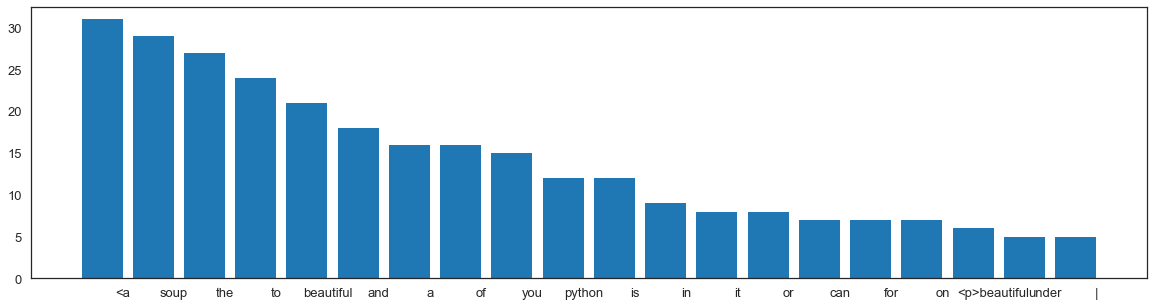

In [67]:
tokens=source.split()#split with no arguments splits on whitespace
#len(hamlettokens)
#hamletlctokens=[word.lower() for word in hamlettokens]
#uniquelctokens=set(hamletlctokens)

uniquelctokens=set(tokens)
tokendict={}
for ut in uniquelctokens:
    tokendict[ut]=tokens.count(ut)
    
tokens=source.split()#split with no arguments splits on whitespace
len(tokens)
tokens=[word.lower() for word in tokens]
uniquelctokens=set(tokens)
tokendict={}
for ut in uniquelctokens:
    tokendict[ut]=tokens.count(ut)
    
L=sorted(tokendict.iteritems(), key= lambda(k,v):v, reverse=True)[:100]

import numpy as np 
topfreq=L[:20]
print (topfreq)
pos = np.arange(len(topfreq))
plt.figure(figsize=(20,5))
plt.bar(pos, [e[1] for e in topfreq]);
plt.xticks(pos+0.4, [e[0] for e in topfreq]);

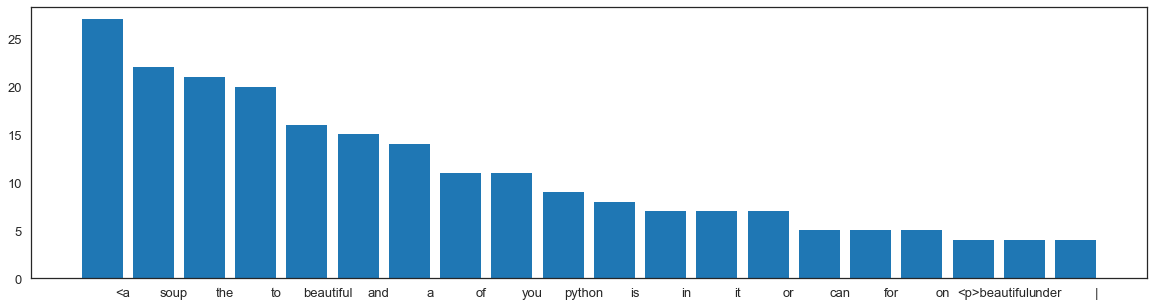

In [66]:
from collections import Counter
diplayed_tokens="". join(bst.findAll(text=True)).replace('\n','').split()
sorted_tokens = sorted(
    Counter(diplayed_tokens).items(),
    key=lambda x: x[1], reverse=True)[:20]
plt.figure(figsize=(20,5))
plt.bar(pos, [w[1] for w in sorted_tokens])
plt.xticks(pos+0.4, [w[0] for w in topfreq]);